\begin{align}
\Psi_L \left(\xi_1,...,\xi_N \right) & \propto \Pi_{i<j} \left(\xi_i - \xi_j \right)^2 e^{-\sum_{i=1}^N |\xi_i|^2/4l_b^2} \\
\Psi_{QH} \left(\xi_1,...,\xi_N,\mathcal{Q} \right) & \propto \Pi_{i=1}^N \left(\xi_i - \mathcal{Q} \right) \Psi_L \left(\xi_1,...,\xi_N \right)
\end{align}

In [1]:
using QuantumOptics
using Combinatorics
using Plots
using LaTeXStrings
using NBInclude
nbexport("Laughlin.jl","Discrete_Laughlin.ipynb")

In [325]:
Nx = 13
Ny = 13
N = Nx*Ny
p = 1
q = 8
PN = 3

3

In [326]:
α = p/q
lb = 1/sqrt(2*pi*α)

1.1283791670955126

In [327]:
QhCoord = [0+im*0]

1-element Vector{Complex{Int64}}:
 0 + 0im

In [328]:
NLevel = NLevelBasis(N)

NLevel(N=169)

In [329]:
C(n,r) = Int(factorial(big(n))/(factorial(big(n-r))*factorial(big(r))))

C (generic function with 1 method)

In [330]:
C(N,PN)

790244

In [368]:
St = fermionstates(NLevel,PN);

In [332]:
mb = ManyBodyBasis(NLevel,St)

ManyBody(onebodybasis=NLevel(N=169), states:790244)

In [333]:
SiteCoords = [ [x,y] for x in -(Nx-1)/2:(Nx-1)/2 for y in -(Ny-1)/2:(Ny-1)/2 ]

169-element Vector{Vector{Float64}}:
 [-6.0, -6.0]
 [-6.0, -5.0]
 [-6.0, -4.0]
 [-6.0, -3.0]
 [-6.0, -2.0]
 [-6.0, -1.0]
 [-6.0, 0.0]
 [-6.0, 1.0]
 [-6.0, 2.0]
 [-6.0, 3.0]
 [-6.0, 4.0]
 [-6.0, 5.0]
 [-6.0, 6.0]
 ⋮
 [6.0, -5.0]
 [6.0, -4.0]
 [6.0, -3.0]
 [6.0, -2.0]
 [6.0, -1.0]
 [6.0, 0.0]
 [6.0, 1.0]
 [6.0, 2.0]
 [6.0, 3.0]
 [6.0, 4.0]
 [6.0, 5.0]
 [6.0, 6.0]

In [334]:
ParCoord(i, SiteCoords) = [ SiteCoords[site] for site in findall(x->x≠0,St[i])]

ParCoord (generic function with 1 method)

In [335]:
# ParCoord(i, SiteCoords) = filter(>([0,0]),St[i].*SiteCoords)

In [336]:
i = 2

2

In [337]:
ParCoord(i, SiteCoords)

3-element Vector{Vector{Float64}}:
 [-6.0, -6.0]
 [-6.0, -5.0]
 [-6.0, -3.0]

In [338]:
ParCoord(84, SiteCoords)

3-element Vector{Vector{Float64}}:
 [-6.0, -6.0]
 [-6.0, -5.0]
 [0.0, 1.0]

In [339]:
ComplexCoords(i, SiteCoords) = Complex.(getindex.(ParCoord(i, SiteCoords), 1),getindex.(ParCoord(i, SiteCoords), 2))

ComplexCoords (generic function with 1 method)

In [340]:
ComplexCoords(i, SiteCoords)

3-element Vector{ComplexF64}:
 -6.0 - 6.0im
 -6.0 - 5.0im
 -6.0 - 3.0im

In [341]:
ComplexCoords(125, SiteCoords)

3-element Vector{ComplexF64}:
 -6.0 - 6.0im
 -6.0 - 5.0im
  3.0 + 3.0im

In [342]:
Comb(i, SiteCoords) = collect(combinations(ComplexCoords(i, SiteCoords),2))

Comb (generic function with 1 method)

In [343]:
Comb(125, SiteCoords)

3-element Vector{Vector{ComplexF64}}:
 [-6.0 - 6.0im, -6.0 - 5.0im]
 [-6.0 - 6.0im, 3.0 + 3.0im]
 [-6.0 - 5.0im, 3.0 + 3.0im]

In [344]:
e(i, SiteCoords) = exp(-sum(abs.(ComplexCoords(i, SiteCoords)).^2)/(4*lb))

e (generic function with 1 method)

In [345]:
e(125, SiteCoords)

2.955624481740286e-15

In [346]:
ComplexCoordsDiff(i, SiteCoords) = getindex.(Comb(i, SiteCoords),1)-getindex.(Comb(i, SiteCoords),2)

ComplexCoordsDiff (generic function with 1 method)

In [347]:
ComplexCoordsDiff(125, SiteCoords)

3-element Vector{ComplexF64}:
  0.0 - 1.0im
 -9.0 - 9.0im
 -9.0 - 8.0im

In [348]:
Ψ_L(i, SiteCoords) =  prod( (ComplexCoordsDiff(i, SiteCoords).^2) ) * e(i, SiteCoords) 
Ψ_1QH(i, SiteCoords) = Ψ_L(i, SiteCoords) * prod(ComplexCoords(i, SiteCoords).-QhCoord)

Ψ_1QH (generic function with 1 method)

In [349]:
SiteCoords

169-element Vector{Vector{Float64}}:
 [-6.0, -6.0]
 [-6.0, -5.0]
 [-6.0, -4.0]
 [-6.0, -3.0]
 [-6.0, -2.0]
 [-6.0, -1.0]
 [-6.0, 0.0]
 [-6.0, 1.0]
 [-6.0, 2.0]
 [-6.0, 3.0]
 [-6.0, 4.0]
 [-6.0, 5.0]
 [-6.0, 6.0]
 ⋮
 [6.0, -5.0]
 [6.0, -4.0]
 [6.0, -3.0]
 [6.0, -2.0]
 [6.0, -1.0]
 [6.0, 0.0]
 [6.0, 1.0]
 [6.0, 2.0]
 [6.0, 3.0]
 [6.0, 4.0]
 [6.0, 5.0]
 [6.0, 6.0]

In [350]:
AllComplexCoords = Complex.(getindex.(SiteCoords, 1),getindex.(SiteCoords, 2))

169-element Vector{ComplexF64}:
 -6.0 - 6.0im
 -6.0 - 5.0im
 -6.0 - 4.0im
 -6.0 - 3.0im
 -6.0 - 2.0im
 -6.0 - 1.0im
 -6.0 + 0.0im
 -6.0 + 1.0im
 -6.0 + 2.0im
 -6.0 + 3.0im
 -6.0 + 4.0im
 -6.0 + 5.0im
 -6.0 + 6.0im
      ⋮
  6.0 - 5.0im
  6.0 - 4.0im
  6.0 - 3.0im
  6.0 - 2.0im
  6.0 - 1.0im
  6.0 + 0.0im
  6.0 + 1.0im
  6.0 + 2.0im
  6.0 + 3.0im
  6.0 + 4.0im
  6.0 + 5.0im
  6.0 + 6.0im

In [351]:
AllComplexCoords.- Ref(QhCoord[1])

169-element Vector{ComplexF64}:
 -6.0 - 6.0im
 -6.0 - 5.0im
 -6.0 - 4.0im
 -6.0 - 3.0im
 -6.0 - 2.0im
 -6.0 - 1.0im
 -6.0 + 0.0im
 -6.0 + 1.0im
 -6.0 + 2.0im
 -6.0 + 3.0im
 -6.0 + 4.0im
 -6.0 + 5.0im
 -6.0 + 6.0im
      ⋮
  6.0 - 5.0im
  6.0 - 4.0im
  6.0 - 3.0im
  6.0 - 2.0im
  6.0 - 1.0im
  6.0 + 0.0im
  6.0 + 1.0im
  6.0 + 2.0im
  6.0 + 3.0im
  6.0 + 4.0im
  6.0 + 5.0im
  6.0 + 6.0im

In [352]:
# ΨΨ_QH = prod(filter(x->x≠(0+0im),(AllComplexCoords .- Ref(QhCoord[1]))))

In [353]:
diag = collect(1:length(St))
coeff = [ Ψ_1QH(i, SiteCoords) for i in 1:length(St)]
#ΨΨ = sparse(diag,diag,coeff)

790244-element Vector{ComplexF64}:
 -1.4425625530533158e-15 + 2.6573520714140025e-15im
  -4.350141585481296e-14 + 1.1117028496229978e-13im
  -3.121935537738804e-13 + 1.3268226035389916e-12im
  -5.267857882179088e-13 + 7.058929562119977e-12im
  1.7750830620079591e-12 + 1.9525913682087552e-11im
   7.898626108539325e-12 + 3.020062923853271e-11im
  1.1898043216048997e-11 + 2.7195527350969138e-11im
   9.048294497801095e-12 + 1.4616475727217155e-11im
   3.843669960438111e-12 + 4.7661507509432576e-12im
    9.53714705073721e-13 + 9.53714705073721e-13im
  1.4169486377657902e-13 + 1.180790531471492e-13im
   1.576387942270613e-16 + 1.576387942270613e-16im
 -1.7738383668165289e-15 - 1.478198639013774e-15im
                         ⋮
  -3.482285320575944e-12 - 1.0795084493785427e-10im
   5.267857882179088e-13 - 7.058929562119977e-12im
 -1.5774391634442563e-11 - 7.887195817221281e-11im
  -9.664454371649665e-12 - 1.0630899808814631e-10im
                     0.0 - 4.05498314085567e-11im
    8.1976858

In [354]:
# ∑ψψ = ΨΨ.nzval

In [355]:
Ket(mb,coeff).data == coeff

true

In [356]:
Kett = normalize(Ket(mb,coeff))

Ket(dim=790244)
  basis: ManyBody(onebodybasis=NLevel(N=169), states:790244)
     -0.0 + 0.0im
     -0.0 + 0.0im
 -1.0e-17 + 2.0e-17im
 -1.0e-17 + 1.3e-16im
  3.0e-17 + 3.7e-16im
  1.5e-16 + 5.7e-16im
  2.2e-16 + 5.1e-16im
  1.7e-16 + 2.7e-16im
  7.0e-17 + 9.0e-17im
  2.0e-17 + 2.0e-17im
      0.0 + 0.0im
      0.0 + 0.0im
     -0.0 - 0.0im
          ⋮
 -7.0e-17 - 2.02e-15im
  1.0e-17 - 1.3e-16im
 -3.0e-16 - 1.48e-15im
 -1.8e-16 - 1.99e-15im
      0.0 - 7.6e-16im
  2.0e-17 - 4.5e-16im
  4.0e-17 - 3.1e-16im
  1.0e-17 - 2.0e-17im
      0.0 - 2.0e-17im
      0.0 - 1.0e-17im
      0.0 - 0.0im
      0.0 - 0.0im

In [357]:
#(abs.(Kett.data).^2)

In [358]:
number(mb,1);

In [359]:
expectation = [expect(number(mb,n),Kett) for n in 1:N]

LoadError: InterruptException:

In [360]:
sum(expectation)

3.0000000000000027 + 0.0im

In [361]:
den = reshape(expectation, Nx, Ny)

LoadError: DimensionMismatch: new dimensions (13, 13) must be consistent with array size 81

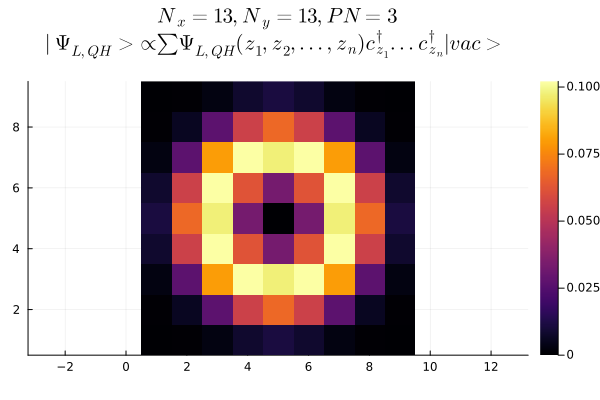

In [362]:
heatmap(real(den),
    title=L"N_x= %$(Nx), N_y= %$(Ny), PN= %$(PN)"*"\n"*L"|Ψ_{L,QH}> ∝ ∑ Ψ_{L,QH}(z_1,z_2,...,z_n) c^{\dagger}_{z_1}...c^{\dagger}_{z_n}|vac>"*"\n"
    ,aspect_ratio=:1
)

In [365]:
DensArray = zeros(N)
for j in 1:length(St)
    DensArray += abs( Kett.data[j] )^2 .*St[j]
end

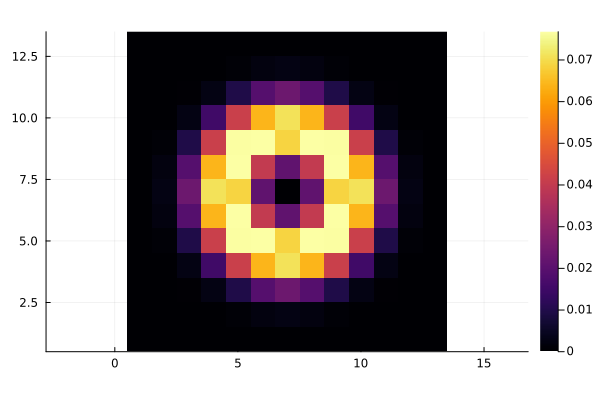

In [367]:
heatmap(reshape(DensArray,Nx,Ny), aspect_ratio=:1)